## Begning data exploration of data set.
- The data are located in the data folder.
- There are the following files:
    - train.csv
    - test.csv
    - sample_submission.csv

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# initialize a varialbe to print descriptive statstic results
print_stats = True

### Next, start by loading data, looking at data types, and looking at missing values

In [2]:
# load data from data/train.csv into a pandas dataframe
df = pd.read_csv('data/train.csv')

# view first 10 rows of data
if print_stats:
    print(df.head(10))


  PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.

### Some variables can be dropped
- Save the `Transported` variable as `y`
- Drop `Name` and `PassengerId` from the `X` set

In [5]:
# make a copy of the df and save as X
X = df.copy()

# drop Transported and save as y
y = X.pop('Transported')

# exclude the Passenger_Id and Name columns
X.drop(['PassengerId', 'Name'], axis=1, inplace=True)

print('Data Summary')
X.describe()

Data Summary


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Take a look at data types and missing variables

In [6]:
# create a dataframe where the rows are column names from X
# and the columns are the data type and number of rows with missing data

df_analysis = pd.DataFrame(columns=['dtype', 'missing'])
df_analysis['dtype'] = X.dtypes
df_analysis['missing'] = X.isnull().sum()
df_analysis['missing_pct'] = df_analysis['missing'] / len(X) * 100

if print_stats:
    print(df_analysis)

                dtype  missing  missing_pct
HomePlanet     object      201     2.312205
CryoSleep      object      217     2.496261
Cabin          object      199     2.289198
Destination    object      182     2.093639
Age           float64      179     2.059128
VIP            object      203     2.335212
RoomService   float64      181     2.082135
FoodCourt     float64      183     2.105142
ShoppingMall  float64      208     2.392730
Spa           float64      183     2.105142
VRDeck        float64      188     2.162660


### There are mixture of categorical and numeric data columns
Will need to split columns into categorical and numeric.
### Each column is missing about 2% of data, so we need to see if we can just drop the data

In [7]:
# calculate the number of rows with missing data
num_rows_missing = df.isnull().any(axis=1).sum()

# calculate the percentage of rows with missing data
percent_rows_missing = round((num_rows_missing / len(df)) * 100, 2)

# print the results
if print_stats:
    print("Number of rows with missing data:", num_rows_missing)
    print("Percentage of rows with missing data:", percent_rows_missing, "%")


Number of rows with missing data: 2087
Percentage of rows with missing data: 24.01 %


### Given that 24% of columns are missing some data, we shouldn't only keep complete rows.
#### will need to impute median/mode for missing values

In [8]:
# Separating numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns

# impute missing numerical values with the median
for col in numerical_columns:
    X[col].fillna(X[col].median(), inplace=True)

# impute mode for missing categorical values
for col in categorical_columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

# check for missing values
if print_stats:
    print(X.isnull().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


### Look at data distributions

<Axes: xlabel='Transported'>

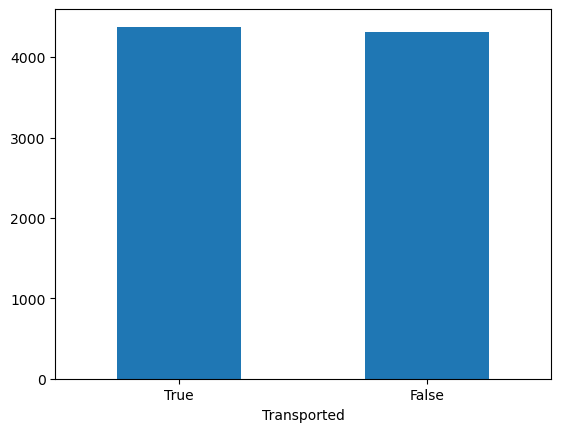

In [14]:
# Plot the value counts of y (Transported)
y.value_counts().plot(kind='bar', rot=0)

#### The value counts of Transported are balanced
### Next, look at the distribution of numeric variables

/var/folders/_7/jc101n2d4n79l6kv7vkhr89r0000gn/T/ipykernel_55226/475465569.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[variable], ax=subplot)
/Users/jimhitt/anaconda3/envs/2023_12_26_KaggleTitanic/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/_7/jc101n2d4n79l6kv7vkhr89r0000gn/T/ipykernel_55226/475465569.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt you

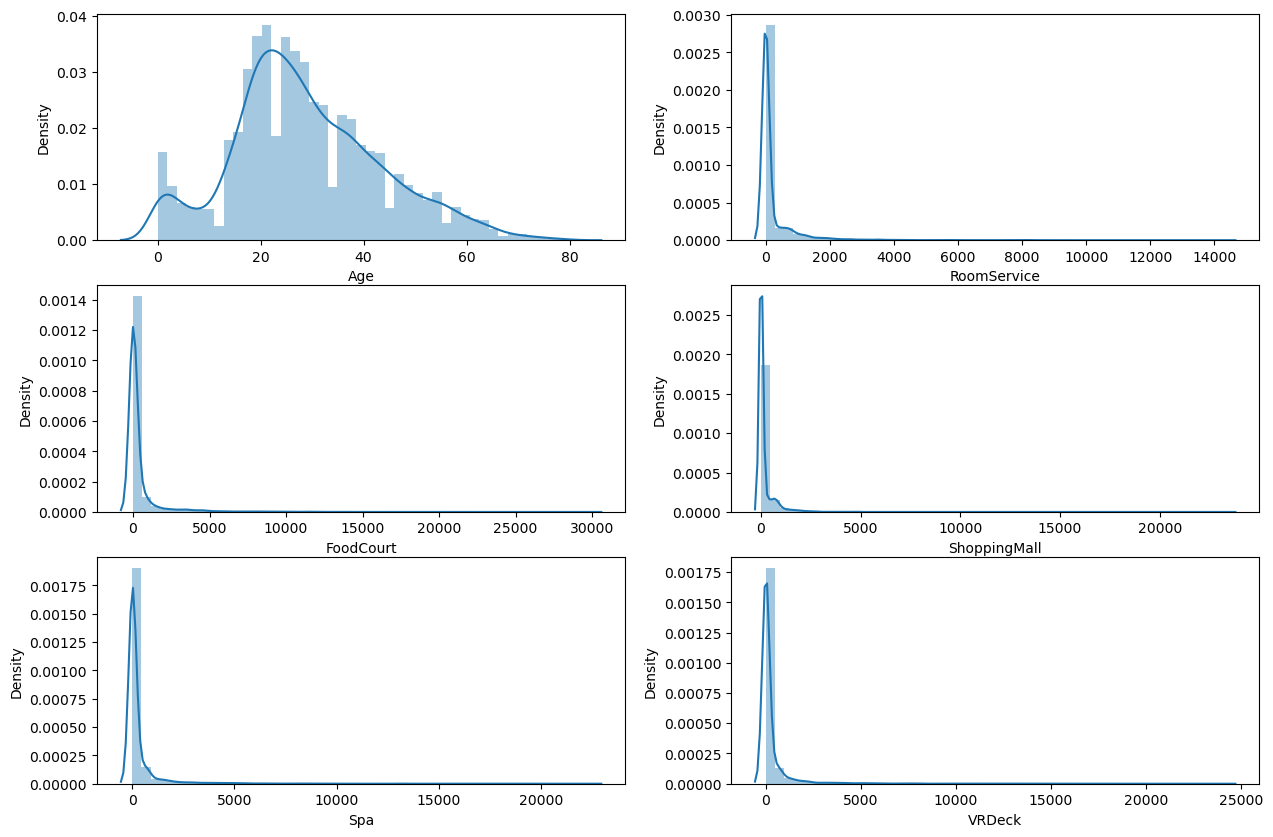

In [20]:
# Plot histograms of the numeric columns in X as a 3 x 2 grid
fig, ax = plt.subplots(3, 2, figsize=(15, 10))


for variable, subplot in zip(numerical_columns, ax.flatten()):
    sns.distplot(X[variable], ax=subplot)



### There are some issues with outliers in all columns but age.
We can train the model with the outliers and look at capping outliers or creating an outlier column later

*The imputation has fixed the missing values.*

### Next, we will start over and create a pipeline:
- Train_test_split
- Do other stuff   


In [27]:
from sklearn.model_selection import train_test_split

y = df['Transported']

#copy X
X = df.copy(deep=True)
# split Cabin into Deck, Number and Side
X[['Cabin_Deck', 'Cabin_Number', 'Cabind_Side']] = X['Cabin'].str.split('/', expand=True)
# cast Cabin_number as int
X['Cabin_Number'] = X['Cabin_Number'].astype('float64')
# drop Cabin, PassengerId and Name
X.drop(['Cabin', 'PassengerId', 'Name', 'Transported'], axis=1, inplace=True)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Number,Cabind_Side
2333,Earth,False,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,NaN,NaN,NaN
2589,Earth,False,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,F,575.0,P
8302,Europa,True,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,C,329.0,S
8177,Mars,False,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,F,1800.0,P
500,Europa,True,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,C,18.0,P


### Next, will work on creating the pipeline

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# generate numerical columns and categorical column lists from X_train datatypes   
numerical_columns = X_train.select_dtypes(include=['float64', 'int64', 'bool']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# create inputers for numerical and categorical data
numerical_inputer = SimpleImputer(strategy='median')
categorical_inputer = SimpleImputer(strategy='most_frequent')

# create one hot encoder for categorical data
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# create column transformer for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
            ('num', numerical_inputer, numerical_columns),
            ('cat', Pipeline(steps = [('imputer', categorical_inputer),
                                      ('onehot', one_hot_encoder)]), categorical_columns)
])

# assemble the pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# apply the pipeline to the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
# apply to validation data
X_val_preprocessed = preprocessing_pipeline.transform(X_val)

# print the shape of the training and validation data
print("Training data shape:", X_train_preprocessed.shape)
print("Validation data shape:", X_val_preprocessed.shape)


Training data shape: (6954, 27)
Validation data shape: (1739, 27)
